In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/spars/Downloads/Insurance-Claim-Fraud-Detection-master/insurance_claims.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# Identifying the columns in the dataframe
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.shape

(1000, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [7]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

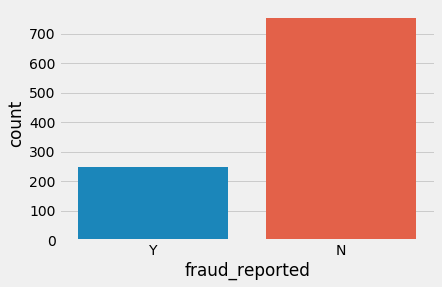

In [8]:
plt.style.use('fivethirtyeight')
sns.countplot(x='fraud_reported',data=df)

In [9]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

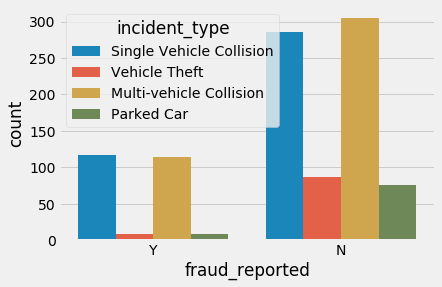

In [10]:
sns.countplot(x='fraud_reported',data=df,hue='incident_type')

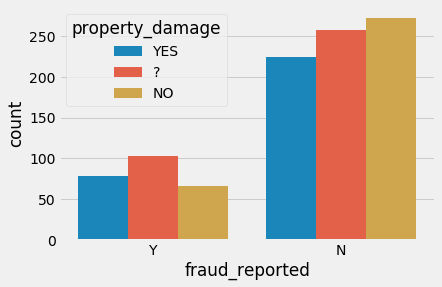

In [11]:
sns.countplot(x='fraud_reported',data=df,hue='property_damage')

In [12]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [13]:
df['fraud_reported'].groupby(df['incident_state']).value_counts()

incident_state  fraud_reported
NC              N                  76
                Y                  34
NY              N                 204
                Y                  58
OH              N                  13
                Y                  10
PA              N                  22
                Y                   8
SC              N                 175
                Y                  73
VA              N                  85
                Y                  25
WV              N                 178
                Y                  39
Name: fraud_reported, dtype: int64

In [14]:
df.groupby('incident_state').fraud_reported.count()

incident_state
NC    110
NY    262
OH     23
PA     30
SC    248
VA    110
WV    217
Name: fraud_reported, dtype: int64

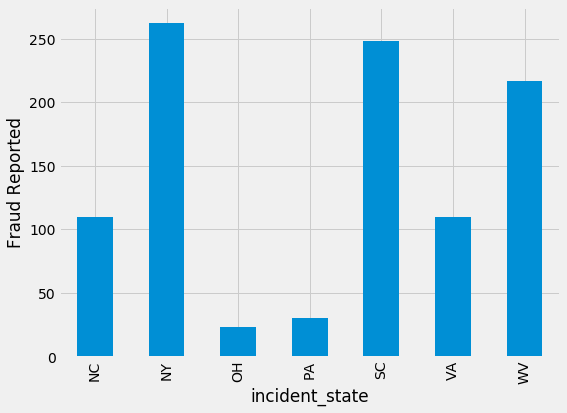

In [15]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(8,6))
ax=df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
plt.show()

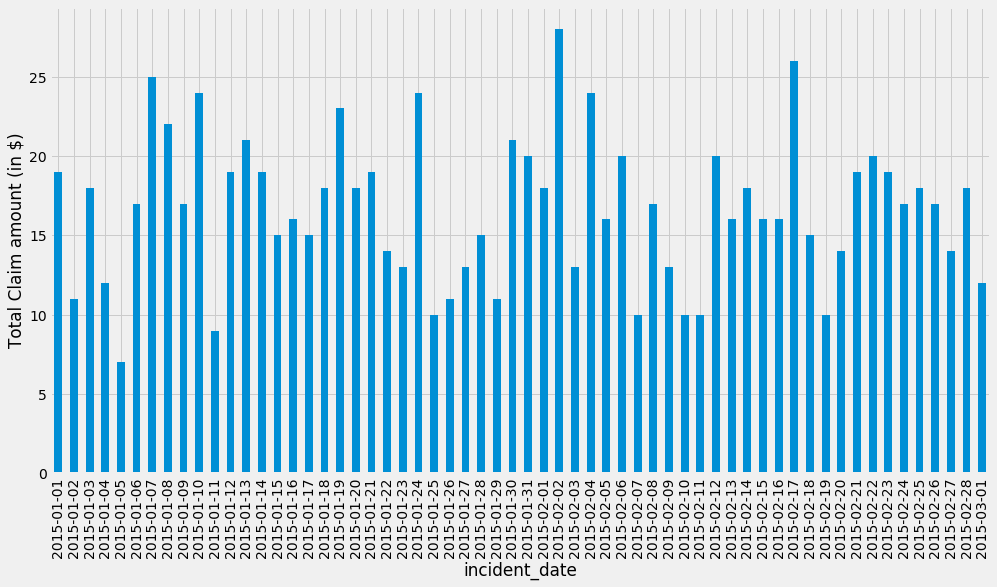

In [16]:
# Plotting total claim amount per day
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
ax=df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total Claim amount (in $)')
plt.show()

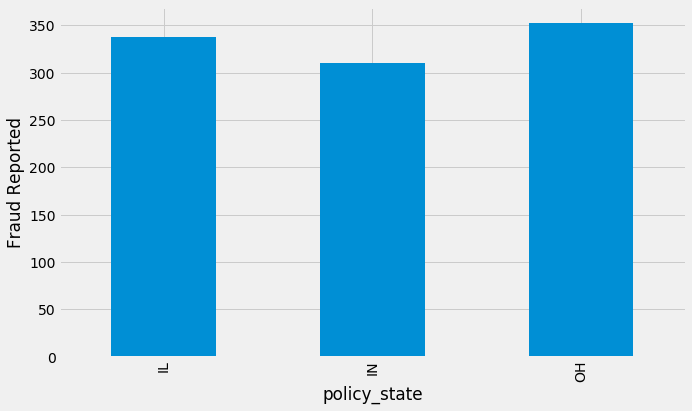

In [17]:
# Plotting fraud reported vs the policy states
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax=df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
plt.show()

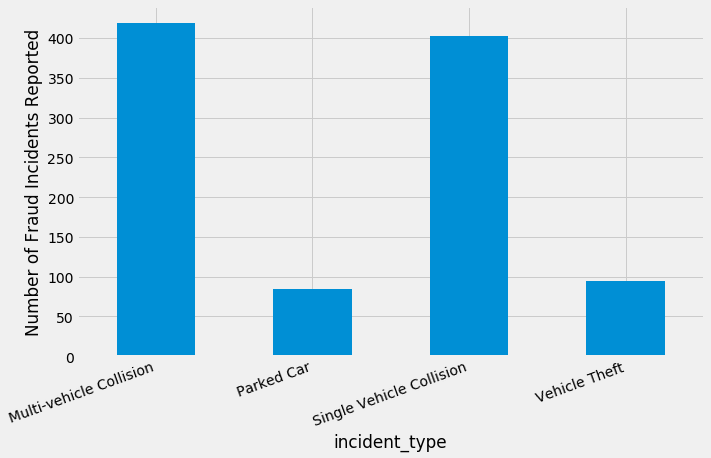

In [18]:
# Plotting fraud reported by incident type
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,ha='right')
ax.set_ylabel('Number of Fraud Incidents Reported')
plt.show()

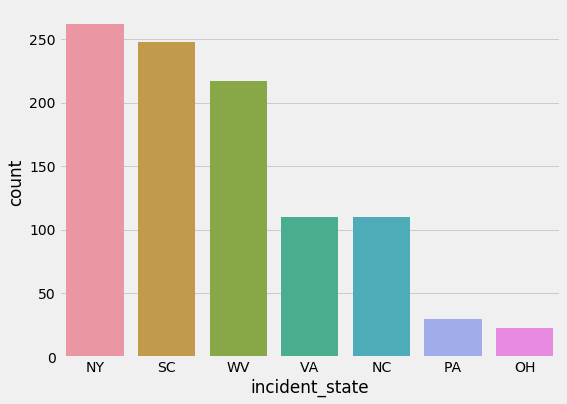

In [19]:
# Plotting statewise count of fraud incident reported. Same as a previous plot but in seaborn
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(8,6))
sns.countplot(x='incident_state',data=df,order=df['incident_state'].value_counts().index)

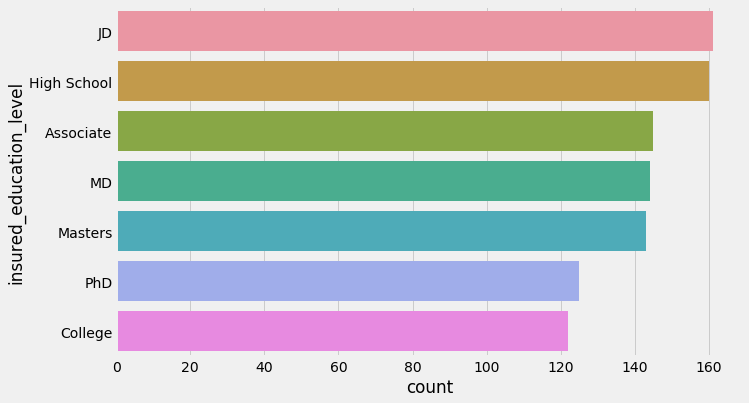

In [20]:
#Plotting the eucation level against the total number of claims reported

fig = plt.figure(figsize=(10,6))
sns.countplot(y='insured_education_level',data=df,order=df['insured_education_level'].value_counts().index)

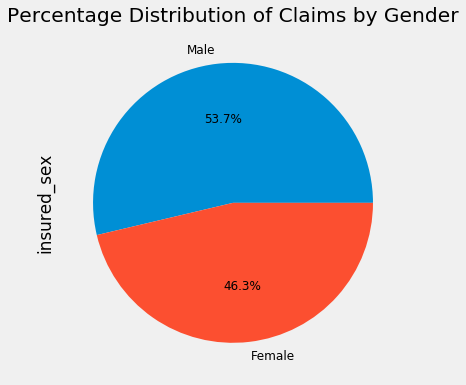

In [21]:
# Plotting claims reported by gender

fig=plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100/len(df)).plot.pie(autopct='%.1f%%',labels=['Male','Female'],fontsize=12)
ax.set_title('Percentage Distribution of Claims by Gender')
plt.show()

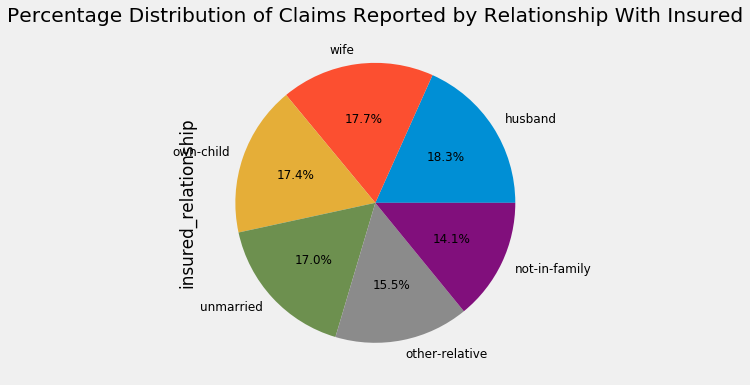

In [22]:
fig=plt.figure(figsize=(10,6))
ax=(df['insured_relationship'].value_counts()*100/len(df)).plot.pie(autopct = '%.1f%%',
                                                                    labels=['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family']
                                                                   ,fontsize=12)
ax.set_title('Percentage Distribution of Claims Reported by Relationship With Insured')
plt.show()

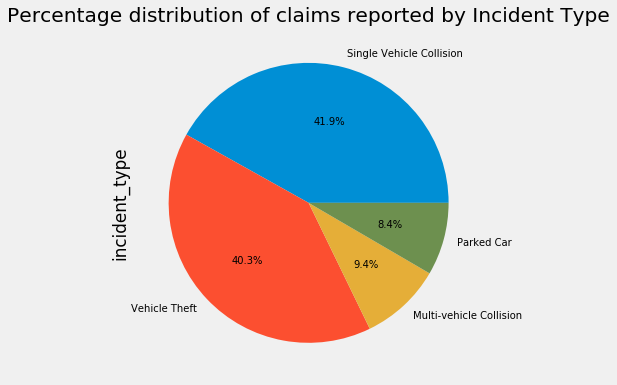

In [23]:
# Representing the percentages incident type wise in a pie-chart
fig=plt.figure(figsize=(9,6))
ax=(df['incident_type'].value_counts()*100/len(df)).plot.pie(autopct='%.1f%%',
    labels=['Single Vehicle Collision', 'Vehicle Theft', 'Multi-vehicle Collision','Parked Car'],fontsize=10)
ax.set_title('Percentage distribution of claims reported by Incident Type')
plt.show()

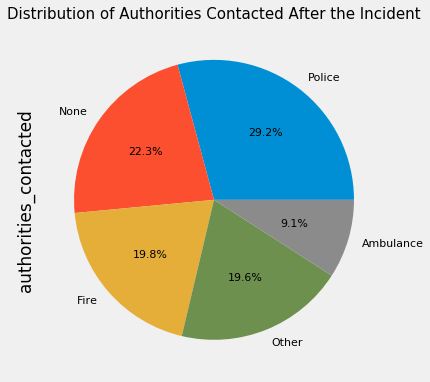

In [24]:
# What authorities were contacted after the incident
fig=plt.figure(figsize=(9,6))
ax=(df['authorities_contacted'].value_counts()*100/len(df)).plot.pie(autopct='%.1f%%'
                                                                    ,labels = ['Police', 'None', 'Fire', 'Other', 'Ambulance']
                                                                    ,fontsize=11)
ax.set_title('Distribution of Authorities Contacted After the Incident',fontsize=15)
plt.show()

In [25]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

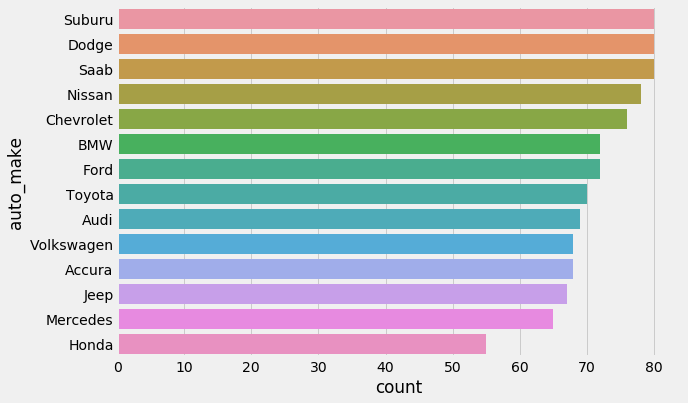

In [26]:
# Which automobiles are frequently involved in the incidents
fig=plt.figure(figsize=(9,6))
sns.countplot(y='auto_make',data=df,order=df['auto_make'].value_counts().index)
plt.show()

In [27]:
# How many claims were reported for each make?
df['auto_make'].value_counts()

Suburu        80
Dodge         80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

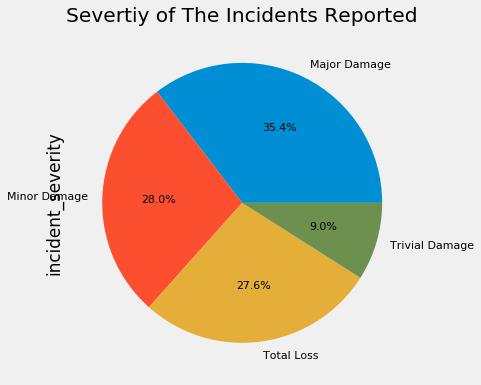

In [28]:
# How severe was the damage?
plt.figure(figsize=(9,6))
ax=(df['incident_severity'].value_counts()*100/len(df)).plot.pie(autopct="%.1f%%"
                                                                ,labels=['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage']
                                                                ,fontsize=11)
ax.set_title('Severtiy of The Incidents Reported')
plt.show()

In [29]:
df['incident_severity'].groupby(df['auto_make']).value_counts()

auto_make   incident_severity
Accura      Minor Damage         29
            Total Loss           19
            Major Damage         15
            Trivial Damage        5
Audi        Major Damage         23
            Total Loss           23
            Minor Damage         13
            Trivial Damage       10
BMW         Minor Damage         33
            Total Loss           19
            Major Damage         16
            Trivial Damage        4
Chevrolet   Minor Damage         29
            Major Damage         21
            Total Loss           19
            Trivial Damage        7
Dodge       Minor Damage         27
            Total Loss           25
            Major Damage         22
            Trivial Damage        6
Ford        Major Damage         24
            Minor Damage         23
            Total Loss           19
            Trivial Damage        6
Honda       Minor Damage         22
            Major Damage         14
            Total Loss           1

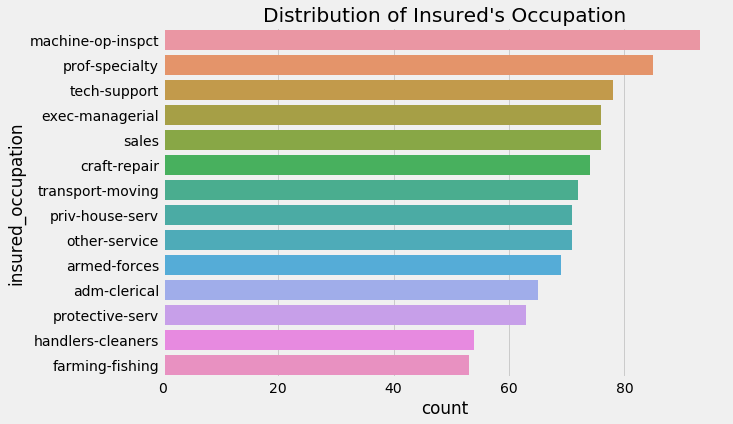

In [30]:
# Pltting the distribution of insured occupation
fig = plt.figure(figsize=(9,6))
sns.countplot(y='insured_occupation',data=df,order=df['insured_occupation'].value_counts().index)
plt.title("Distribution of Insured's Occupation")
plt.show()

In [31]:
# Grouping the incident severity by insured's occupation
df['insured_occupation'].groupby(df['incident_severity']).value_counts()

incident_severity  insured_occupation
Major Damage       exec-managerial       26
                   machine-op-inspct     26
                   prof-specialty        24
                   tech-support          23
                   craft-repair          22
                   transport-moving      22
                   sales                 21
                   armed-forces          19
                   handlers-cleaners     19
                   farming-fishing       18
                   other-service         17
                   protective-serv       16
                   priv-house-serv       13
                   adm-clerical          10
Minor Damage       armed-forces          35
                   adm-clerical          30
                   machine-op-inspct     30
                   prof-specialty        28
                   sales                 28
                   craft-repair          27
                   other-service         27
                   protective-serv    

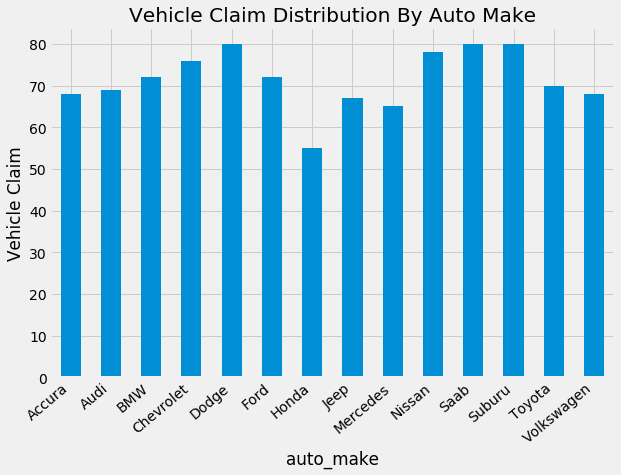

In [32]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(9,6))
ax=df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
ax.set_ylabel('Vehicle Claim')
plt.title('Vehicle Claim Distribution By Auto Make')
plt.show()

### Pre-processing the Data

In [33]:
# Replacing the 'Y' and 'N' in fraud_reported by 1 and 0
df['fraud_reported'].replace(to_replace='Y',value=1,inplace=True)
df['fraud_reported'].replace(to_replace='N',value=0,inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [34]:
# Converting the zip code to object type
df['insured_zip']=df['insured_zip'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null object
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date   

In [35]:
# Creating a new column that includes the age of the vehicle
df['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [36]:
df['vehicle_age'] = 2018 - df['auto_year']
df['vehicle_age'].head()

0    14
1    11
2    11
3     4
4     9
Name: vehicle_age, dtype: int64

In [37]:
# Creating a new column by categorizing incidents based on the hour of day when they occurred.
bins = [-1,3,6,9,12,17,20,24]
names=["past midnight","early morning","morning","forenoon","afternoon","evening","night"]
df['incident_period_of_the_day'] = pd.cut(df['incident_hour_of_the_day'],bins,labels=names).astype(object)
df[['incident_hour_of_the_day','incident_period_of_the_day']].head(15)

,incident_hour_of_the_day,incident_period_of_the_day
0,5,early morning
1,8,morning
2,7,morning
3,5,early morning
4,20,evening
5,19,evening
6,0,past midnight
7,23,night
8,21,night
9,14,afternoon


In [38]:
# Checking out which columns have object data types
df.select_dtypes(include='object').columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'incident_period_of_the_day'],
      dtype='object')

In [39]:
# dropping unwanted columns
df=df.drop(columns=['policy_number', 'insured_zip','policy_bind_date','incident_date','incident_location','_c39','auto_year', 
    'incident_hour_of_the_day'])
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_the_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,0,11,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,4,early morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,0,9,evening


In [40]:
# Identifying variables with missing (?) values
unknowns={}
for i in list(df.columns):
    j=0
    if (df[i]).dtype==object:
        j=np.sum(df[i]=='?')
    unknowns[i]=j
unknowns=DataFrame.from_dict(unknowns,orient='index')
unknowns

,0
months_as_customer,0
age,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_sex,0
insured_education_level,0
insured_occupation,0


#### Checking out the distribution of the  columns with unknown values

In [41]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

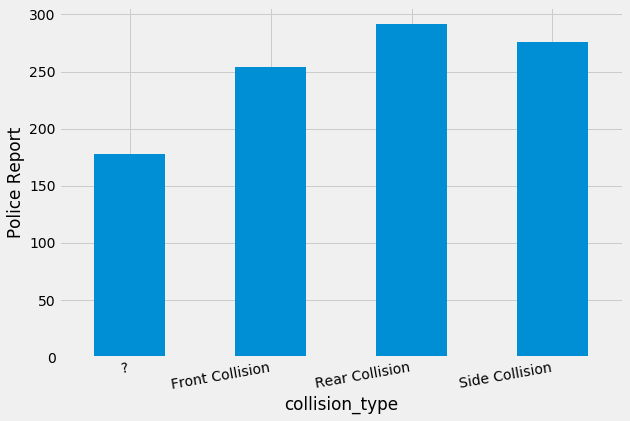

In [42]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(9,6))
ax=df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10,ha='right')
ax.set_ylabel('Police Report')
plt.show()

In [43]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

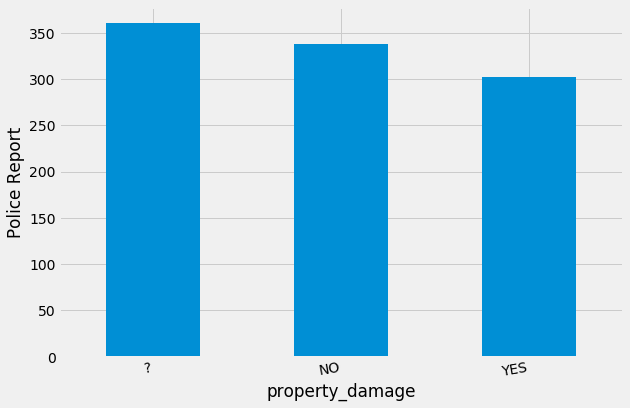

In [44]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(9,6))
ax=df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10,ha='right')
ax.set_ylabel('Police Report')
plt.show()

In [45]:
# Checking which columns have numeric values
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [46]:
# Checking columns with categorical values
df.select_dtypes(include=['object']).columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_the_day'],
      dtype='object')

In [47]:
dummies = pd.get_dummies(df[[
    'policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model',
    'incident_period_of_the_day']])

dummies = dummies.join(df[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_the_day_early morning,incident_period_of_the_day_evening,incident_period_of_the_day_forenoon,incident_period_of_the_day_morning,incident_period_of_the_day_night,incident_period_of_the_day_past midnight,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,?,?,?,1
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,Rear Collision,NO,NO,0
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,Front Collision,?,NO,1
4,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,?,NO,NO,0


In [48]:
# Separating the input and output variables
X = dummies.iloc[:,0:-1]
Y = dummies.iloc[:,-1]

In [49]:
X.shape

(1000, 145)

In [50]:
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [51]:
Y.shape

(1000,)

### Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type','collision_en']].head()

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0


In [53]:
X['property_damage'].replace(to_replace='YES',value=1,inplace=True)
X['property_damage'].replace(to_replace='NO',value=0,inplace=True)
X['property_damage'].replace(to_replace='?',value=0,inplace=True)
X['police_report_available'].replace(to_replace='YES',value=1,inplace=True)
X['police_report_available'].replace(to_replace='NO',value=0,inplace=True)
X['police_report_available'].replace(to_replace='?',value=0,inplace=True)

In [54]:
X.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_the_day_early morning,incident_period_of_the_day_evening,incident_period_of_the_day_forenoon,incident_period_of_the_day_morning,incident_period_of_the_day_night,incident_period_of_the_day_past midnight,collision_type,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,Side Collision,1,1,3
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,?,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,Rear Collision,0,0,2
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,Front Collision,0,0,1
4,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,?,0,0,0


In [55]:
X=X.drop(columns='collision_type')
X.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_the_day_afternoon,incident_period_of_the_day_early morning,incident_period_of_the_day_evening,incident_period_of_the_day_forenoon,incident_period_of_the_day_morning,incident_period_of_the_day_night,incident_period_of_the_day_past midnight,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,3
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
X=pd.concat([X,df._get_numeric_data()],axis=1)
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,0,0,1,0,1,0,0,1,0,0,...,0,1,1,2,71610,6510,13020,52080,1,14
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,5070,780,780,3510,1,11


In [57]:
X = X.drop(columns='fraud_reported')
X.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,0,0,1,0,1,0,0,1,0,0,...,53300,0,1,1,2,71610,6510,13020,52080,14
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,5070,780,780,3510,11
2,0,0,1,1,0,0,1,0,0,0,...,35100,0,3,2,3,34650,7700,3850,23100,11
3,1,0,0,0,1,0,1,0,0,0,...,48900,-62400,1,1,2,63400,6340,6340,50720,4
4,1,0,0,0,0,1,0,1,1,0,...,66000,-46000,1,0,1,6500,1300,650,4550,9


### Using train and test data to evaluate the algorithm

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [59]:
# Evaluating LDA on the dataset using k-fold cross-validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5,random_state=7)
result = cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
print(result.mean())

0.841


C:\Users\spars\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\spars\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\spars\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\spars\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\spars\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 160)
(200, 160)
(800,)
(200,)


In [62]:
# Using Random Forest for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,cohen_kappa_score
from sklearn import metrics

In [63]:
rfc = RandomForestClassifier(n_estimators=1000,max_features='auto',criterion='gini',n_jobs=-1,verbose=1,
                             class_weight='balanced')
rfcg=rfc.fit(X_train,Y_train) # Fitting the model on training data
predictions = rfcg.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [64]:
print('Number of features: ',len(list(X.columns)))
print('Accuracy: ',round(accuracy_score(Y_test,predictions)*100,2))
print('Recall: ',round(recall_score(Y_test,predictions)*100,2))
print('\n')
print('Classification Report:\n\n ',classification_report(Y_test,predictions))

Number of features:  160
Accuracy:  73.0
Recall:  24.59


Classification Report:

                precision    recall  f1-score   support

           0       0.74      0.94      0.83       139
           1       0.65      0.25      0.36        61

    accuracy                           0.73       200
   macro avg       0.70      0.59      0.59       200
weighted avg       0.71      0.73      0.69       200



In [65]:
from sklearn.metrics import confusion_matrix

import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix
[[131   8]
 [ 46  15]]


<Figure size 432x288 with 0 Axes>

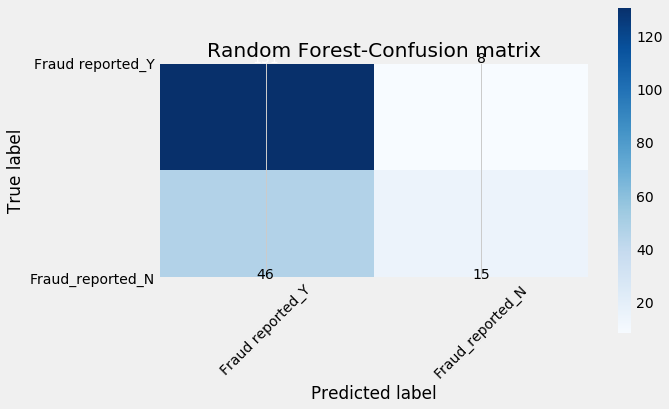

In [67]:
# Compute confusion martix
cnf_matrix = confusion_matrix(Y_test,predictions)
np.set_printoptions(precision=2)

# Plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
                      title='Random Forest-Confusion matrix')

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LR: 0.812500 (0.034460)
XGB: 0.797500 (0.036142)
KNN: 0.738750 (0.035111)
DT: 0.780000 (0.031225)
SVM: 0.777500 (0.022220)
RF: 0.763750 (0.030847)
ADA: 0.778750 (0.034483)


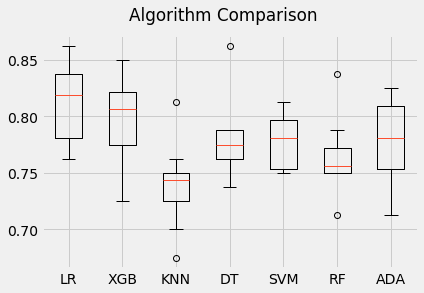

In [69]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

xgb = XGBClassifier()
logreg2= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dtclf = DecisionTreeClassifier(max_depth=5)
rfclf = RandomForestClassifier()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Above a list of each algorithm, the mean accuracy and the standard deviation accuracy and a box & whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.
It is clear that the LR or LDA is good enough for both feature selection (81% and 84% accuracy with 100 features) as well as model selection.